# Results Analysis - Use Features and Similarity Measure 

In [1]:
import os
import glob
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('../')

In [2]:
from scipy.signal import argrelmin, argrelmax

In [3]:
from dap import DAPcython
from dap.utils import obs_params, load_current
from tqdm import tqdm
from scipy.spatial import distance

### Set Parameters

In [4]:
dt = 1e-2
params, labels = obs_params(reduced_model=False)
data_dir = '/home/alteska/Desktop/LFI_DAP/data/rawData/2015_08_26b.dat'

### load the file

In [2]:
df_param = pd.read_csv('dap_models_4_param_1x20.csv')

NameError: name 'pd' is not defined

### calculate DAP

In [6]:
# load the input data
Ir, vr, tr, t_onr, t_offr, dtr = load_current(data_dir, protocol='rampIV', ramp_amp=3.1)
Is, vs, ts, t_ons, t_offs, dts = load_current(data_dir, protocol='IV', ramp_amp=1)

# define a model
dap = DAPcython(-75, params)

In [7]:
# run models on original parameters
U_step = dap.simulate(dts, ts, Is)
U_ramp = dap.simulate(dtr, tr, Ir)

### run for all cells and save into the the DF

In [8]:
df_param.head()

,Unnamed: 0,gbar_nap,gbar_leak,gbar_nat,gbar_kdr
0,1x14,17.173732,1.074666,131.422942,3.410514
1,1x35,17.097219,1.039869,117.684230,3.737484
2,1x9,19.007380,0.991425,95.365731,2.976070
3,1x19,16.370543,1.028504,141.774573,3.430032
4,1x24,15.153335,1.100184,163.721094,3.055541


In [9]:
daps = []
U_steps = []
U_ramps = []

for i, j in tqdm(df_param.iterrows()):
    # get parameters
    par_temp = j.values

    # define a model
    daps.append(DAPcython(-75, j))

    # run model
    U_steps.append(pd.Series(dap.simulate(dts, ts, Is).transpose()[0]))
    U_ramps.append(dap.simulate(dtr, tr, Ir).transpose()[0])

34it [00:41,  1.19s/it]


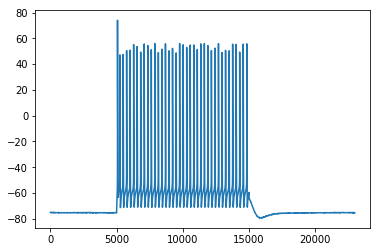

In [10]:
plt.plot(U_steps[0]);

### Create DF with traces

In [11]:
df_arr = pd.DataFrame({'traces': U_steps})
df_arr.set_index(df_param.index.values, inplace=True)
df_arr.head()

,traces
0,0 -75.005472 1 -75.000934 2 ...
1,0 -74.995904 1 -75.018731 2 ...
2,0 -75.014146 1 -74.967661 2 ...
3,0 -75.003312 1 -74.999797 2 ...
4,0 -74.988506 1 -75.018799 2 ...


In [12]:
df_arr2 = pd.DataFrame({'traces': U_ramps})
df_arr2.set_index(df_param.index.values, inplace=True)
df_arr2.head()

,traces
0,"[-75.00864950685363, -75.05150292896398, -75.0..."
1,"[-75.01226539635884, -75.00498457715724, -75.0..."
2,"[-75.01648613515714, -75.00273598593846, -74.9..."
3,"[-75.00818550891847, -75.00728230753295, -74.9..."
4,"[-74.99596799835187, -75.0126251196376, -75.00..."


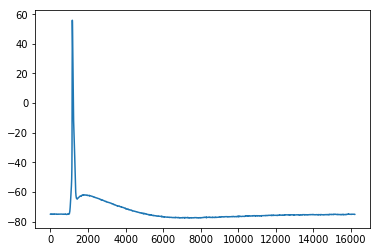

In [13]:
plt.plot(df_arr2.traces[0])

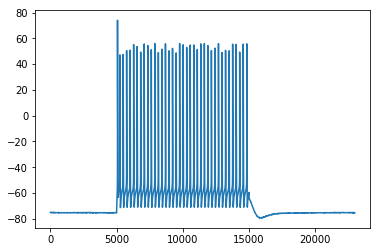

In [14]:
plt.plot(df_arr.traces[0])

In [15]:
import csv
df_arr.to_csv('test.csv', index=True, quoting=csv.QUOTE_ALL)

In [16]:
test_arr = pd.read_csv('test.csv')
test_arr.head()

,Unnamed: 0,traces
0,0,0 -75.005472\n1 -75.000934\n2 ...
1,1,0 -74.995904\n1 -75.018731\n2 ...
2,2,0 -75.014146\n1 -74.967661\n2 ...
3,3,0 -75.003312\n1 -74.999797\n2 ...
4,4,0 -74.988506\n1 -75.018799\n2 ...


In [17]:
df_arr2.to_csv('test2.csv', index=True, quoting=csv.QUOTE_ALL)

In [18]:
test_arr2 = pd.read_csv('test2.csv')
test_arr2.head()

,Unnamed: 0,traces
0,0,[-75.00864951 -75.05150293 -75.02434016 ... -7...
1,1,[-75.0122654 -75.00498458 -75.01665545 ... -7...
2,2,[-75.01648614 -75.00273599 -74.99975857 ... -7...
3,3,[-75.00818551 -75.00728231 -74.99883708 ... -7...
4,4,[-74.995968 -75.01262512 -75.00607909 ... -7...


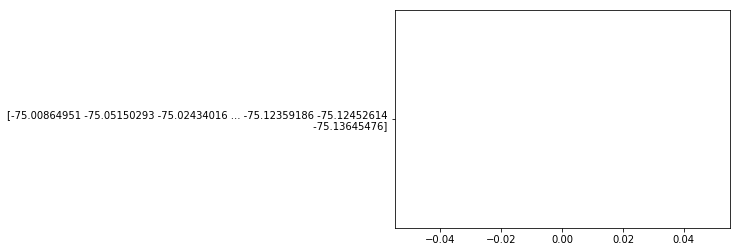

In [19]:
plt.plot(test_arr2.traces[0])

In [20]:
x = test_arr.traces[0]